In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

# K-means

In [151]:
from sklearn.datasets import make_blobs

NORMAL_DATA_N = 1000
args = {
        # 正常値のデータ点数
        'n_samples': NORMAL_DATA_N,
        # 特徴量の次元数
        'n_features': 2,
        # クラスタの数
        'centers': 3,
        # データを生成するための乱数
        'random_state': 42,
    }
X_normal, y_normal = make_blobs(**args)

No handles with labels found to put in legend.


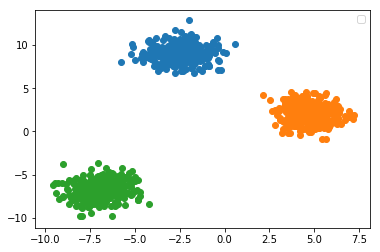

In [152]:
plt.scatter(X_normal[y_normal == 0, 0],
            X_normal[y_normal == 0, 1],
            )
plt.scatter(X_normal[y_normal == 1, 0],
            X_normal[y_normal == 1, 1],
            )
plt.scatter(X_normal[y_normal == 2, 0],
            X_normal[y_normal == 2, 1],
            )
plt.legend()
plt.show()

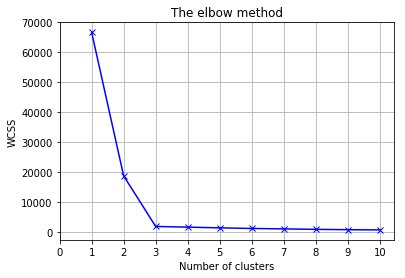

In [168]:
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss, 'bx-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.xticks(np.arange(0, 11, 1.0))
plt.grid()
plt.savefig("elbow.png",format = 'png', dpi=300)

In [202]:
kmeans = KMeans(n_clusters = 3, random_state=0)
y_kmeans = kmeans.fit_predict(X_normal)

In [170]:
from sklearn.metrics import adjusted_rand_score
ars = adjusted_rand_score(y_normal, y_kmeans)
print('ars={}'.format(ars))

ars=1.0


No handles with labels found to put in legend.


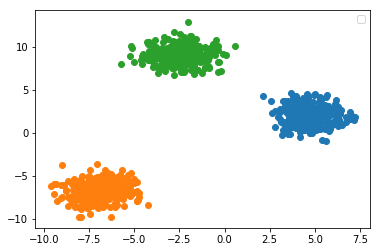

In [171]:
plt.scatter(X_normal[y_kmeans == 0, 0],
            X_normal[y_kmeans == 0, 1],
            )
plt.scatter(X_normal[y_kmeans == 1, 0],
            X_normal[y_kmeans == 1, 1],
            )
plt.scatter(X_normal[y_kmeans == 2, 0],
            X_normal[y_kmeans == 2, 1],
            )
plt.legend()
plt.show()

In [199]:
OUTLIER_DATA_N = 100
DISTRIBUTION_RANGE = 6
X_outlier = np.random.uniform(low=-DISTRIBUTION_RANGE,
                               high=DISTRIBUTION_RANGE,
                               size=(OUTLIER_DATA_N, 2))
y_outlier = np.ones((OUTLIER_DATA_N, ))

No handles with labels found to put in legend.


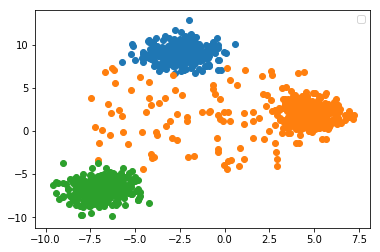

In [200]:
X_outlier += X_normal.mean(axis=0)
X = np.concatenate([X_normal, X_outlier], axis=0)
y = np.concatenate([y_normal, y_outlier], axis=0)

plt.scatter(X[y == 0, 0],
            X[y == 0, 1],
            )
plt.scatter(X[y == 1, 0],
            X[y == 1, 1],
            )
plt.scatter(X[y == 2, 0],
            X[y == 2, 1],
           )
plt.legend()
plt.show()

In [203]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X_normal)
    wcss.append(kmeans.inertia_)

In [204]:
kmeans = KMeans(n_clusters = 3, random_state=0)
y_kmeans = kmeans.fit_predict(X)

In [205]:
from sklearn.metrics import adjusted_rand_score
ars = adjusted_rand_score(y, y_kmeans)
print('ars={}'.format(ars))

ars=0.8699812108326131


No handles with labels found to put in legend.


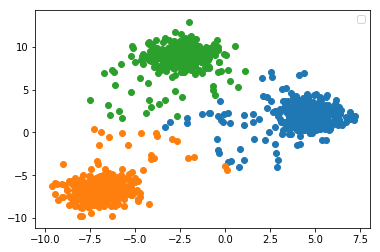

In [206]:
plt.scatter(X[y_kmeans == 0, 0],
            X[y_kmeans == 0, 1],
            )
plt.scatter(X[y_kmeans == 1, 0],
            X[y_kmeans == 1, 1],
            )
plt.scatter(X[y_kmeans == 2, 0],
            X[y_kmeans == 2, 1],
            )
plt.legend()
plt.show()

In [207]:
from sklearn.mixture import GaussianMixture
n_component=3
gmm = GaussianMixture(n_component,covariance_type='full')
y_gmm = gmm.fit_predict(X)
ars = adjusted_rand_score(y, y_gmm)
print('ars={}'.format(ars))

ars=0.8908342981328801


No handles with labels found to put in legend.


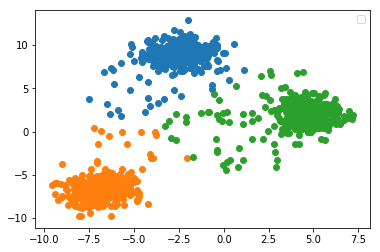

In [209]:
plt.scatter(X[y_gmm == 0, 0],
            X[y_gmm == 0, 1],
            )
plt.scatter(X[y_gmm == 1, 0],
            X[y_gmm == 1, 1],
            )
plt.scatter(X[y_gmm == 2, 0],
            X[y_gmm == 2, 1],
            )
plt.legend()
plt.show()

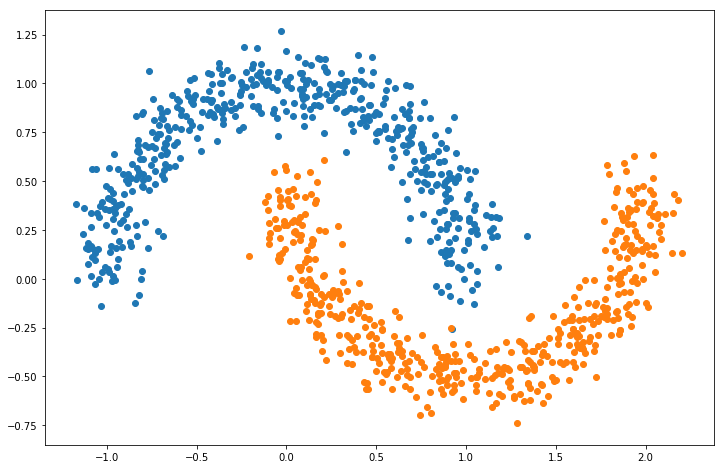

In [212]:
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=1000, noise=0.1, random_state=0)

plt.figure(figsize=(12, 8))
plt.scatter(X[y == 0, 0],
            X[y == 0, 1],
            )
plt.scatter(X[y == 1, 0],
            X[y == 1, 1],
            )
plt.show()

In [213]:
n_component=2
gmm = GaussianMixture(n_component,covariance_type='full')
y_gmm = gmm.fit_predict(X)
ars = adjusted_rand_score(y, y_gmm)
print('ars={}'.format(ars))

ars=0.5093048155939687


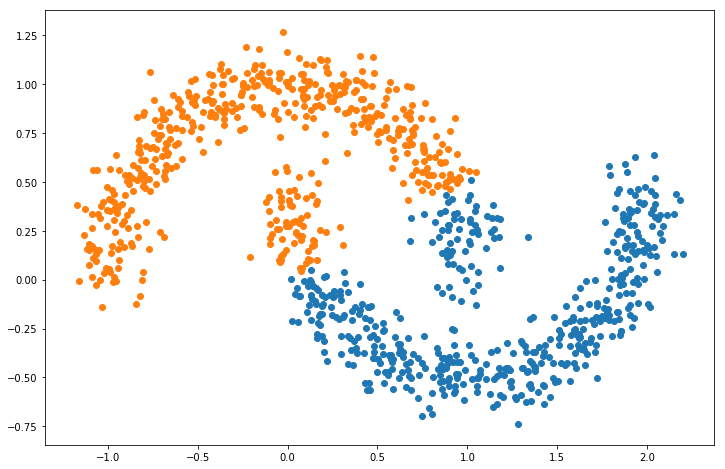

In [214]:
plt.figure(figsize=(12, 8))
plt.scatter(X[y_gmm == 0, 0],
            X[y_gmm == 0, 1],
            )
plt.scatter(X[y_gmm == 1, 0],
            X[y_gmm == 1, 1],
            )
plt.show()

# Hierarchical clustering

In [229]:
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet

In [230]:
iris = load_iris()
X = iris.data
y = iris.target

In [231]:
df= pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target_names[iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<function matplotlib.pyplot.show(*args, **kw)>

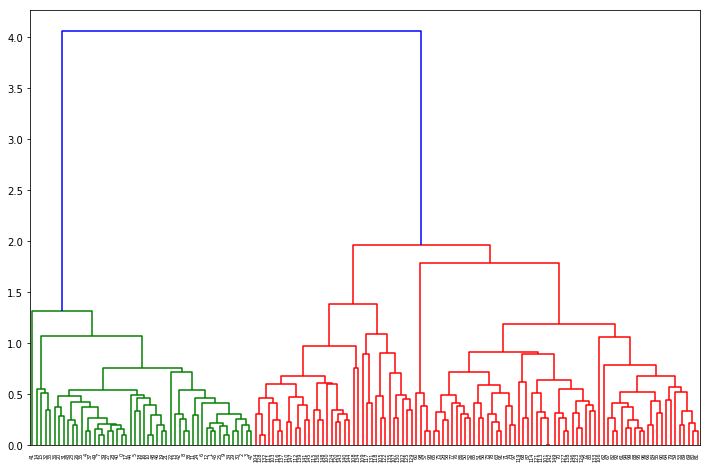

In [232]:
z =linkage(X, method='average', metric='euclidean')
plt.figure(figsize=(12, 8))
dendrogram(z)
plt.show

In [239]:
from scipy.spatial.distance import pdist
def clustering_score():
    X = iris.data
    y = iris.target
    methods = ["single", "complete", "average", "weighted",
               "centroid", "median", "ward"]
    for method in methods:
        S = pdist(X)
        Z = linkage(S, method=method)
        c, d = cophenet(Z, S)
        print("{0} {1:.3f}".format(method, c))

In [240]:
clustering_score()

single 0.864
complete 0.727
average 0.877
weighted 0.868
centroid 0.877
median 0.738
ward 0.873
